<h3 style="color:blue">2(a): Start with an image of theMona Lisa. If you don’t like theMona Lisa, pick another interesting
image of your choice.

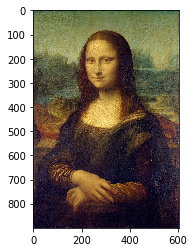

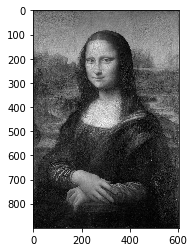

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import random

img = PIL.Image.open("mona_lisa.jpg")
img_np = np.asarray(img)
# print(img_np)
plt.imshow(img_np)
plt.show()

img_bw = img.convert("L")
img_np_bw = np.asarray(img_bw)
plt.imshow(img_np_bw, cmap="gray")
plt.show()

# print(img_np_bw)
# print.shape)

<h3 style="color:blue">2(b) Preprocessing the input. To build your “training set,” uniformly sample 5,000 random (x, y) coordinate locations. 
<br>
    <br>
What other preprocessing steps are necessary for random forests inputs? Describe them, implement them, and justify your decisions. In particular, do you need to perform mean subtraction, standardization, or unit-normalization?
    
<h3 style="color:k">Answer: The random samples are extracted using a uniform random integer function in the range of the image's width and length. <br><br>There are not required preprocessing steps for these random forest inputs as long as the coordinates and relative values of the pixels are not impacted by processing into Jupyter.

In [151]:
# Generate Random Indexes

random_indexes = np.column_stack(([random.randint(0,len(img_np[:])-1) for i in range(5000)],[random.randint(0,len(img_np[0,:])-1) for i in range(5000)]))

random_indexes = list(random_indexes)
# If enabled, this shows that the element extracted (rgb values)
# are correct for the first rand_forest_in element. RUN WITH CELL BELOW.

print(random_indexes[1])



[123   1]


<h3 style="color:blue">2(c) Preprocessing the output. Sample pixel values at each of the given coordinate locations. Each pixel contains red, green, and blue intensity values, so decide how you want to handle
this.
<h3 style="color:k">Answer: We decided to use grayscale as our input. Since the intent of the exercise is to show the usefulness of Random Forest's in reconstructing the given image, little value would have been derived in producing functions for all three channels (rgb) and then recombining the outputs to show a colored image.

In [153]:
##########################
### Extract Gray values ##
##########################

rand_forest_in = [img_np_bw[i[0],i[1]] for i in random_indexes]

# If enabled, this shows that the element extracted (rgb values)
# are correct for the first rand_forest_in element.

# print(rand_forest_in)
# print(img_np[random_indexes[0,0],random_indexes[0,1]].shape)
# print(img_np[random_indexes[0,0],random_indexes[0,1]])
# Test Shape / Test Max Value

# print(np.array(rand_forest_in).shape)
# print(rand_forest_in)
# print(np.amax(rand_forest_in[:,:]))

In [ ]:
# Import additional packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import ensemble

In [92]:
# Extrat indexes and pixel intensities
ind_img = [i[0] for i in np.ndenumerate(img_bw)]
val_img = [i[1] for i in np.ndenumerate(img_bw)]

# print(ind_img)
# print(val_img )


<h3 style="color:blue">2(d) To build the final image, for each pixel of the output, feed the pixel coordinate through the random forest and color the resulting pixel with the output prediction. You can then use
imshow to view the result. (If you are using grayscale, try imshow(Y, cmap=’gray’) to avoid fake-coloring). You may use any implementation of random forests, but you should understand the implementation and you must cite your sources.
    
<h3 style="color:k">Answer: The sklearn Random Forest Regressor function was used to produce the final image. The pyplot package was used to plot the final grayscale image.


(543600, 1)
[74.]


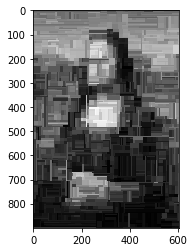

In [156]:
for n in [1]:
    clf = ensemble.RandomForestRegressor(n_estimators = 1)
    clf = clf.fit(random_indexes, rand_forest_in )

    aa = np.array([(clf.predict([i])) for i in ind_img])
    print(aa.shape)
    print(aa[0])

    aa =aa.reshape(900,604)

    plt.imshow(aa, cmap="gray")
    plt.show()

<h3 style="color:blue">2(e)  i. Repeat the experiment for a random forest containing a single decision tree, but with depths 1, 2, 3, 5, 10, and 15. How does depth impact the result? Describe in detail why.

<h3 style="color:k">Answer: By increasing the depth of the tree, we are increasing the number of possible values pixel intensity can take. For instance, for a depth of 1, 2^1=2 pixel intensity values can be generated, resulting in  very low resolution. As the number of trees (n) increases, the possible pixel intensity values increase by a factor of 2^n.


(543600, 1)
[102.81515712]


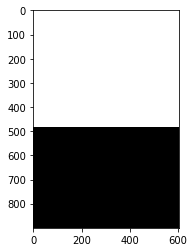

(543600, 1)
[121.49308756]


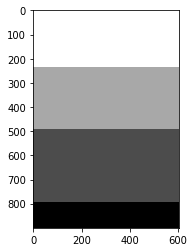

(543600, 1)
[114.25114155]


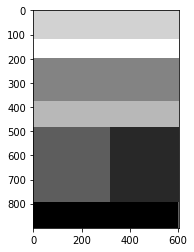

(543600, 1)
[87.7]


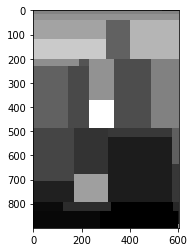

(543600, 1)
[74.]


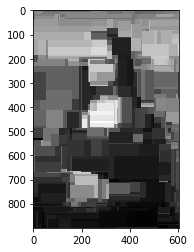

(543600, 1)
[74.]


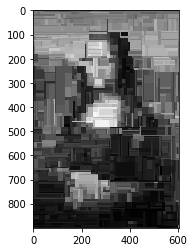

In [159]:
for n in [1,2,3,5,10,15]:
    clf = ensemble.RandomForestRegressor(n_estimators = 1, max_depth = n)
    clf = clf.fit(random_indexes, rand_forest_in )

    aa = np.array([(clf.predict([i])) for i in ind_img])
    print(aa.shape)
    print(aa[0])

    aa =aa.reshape(900,604)

    plt.imshow(aa, cmap="gray")
    plt.show()

<h3 style="color:blue">2(e) ii. Repeat the experiment for a random forest of depth 7, but with number of trees equal to 1, 3, 5, 10, and 100. How does the number of trees impact the result? Describe in detail why.

<h3 style="color:k"> Answer: By increasing the number of trees in the forest, we're taking an average of the different predictions for N tress, thereby increasing the regressor's tolerance to a noisy prediction coming from any single tree. This is achieved at the expense of image sharpness. Because every tree will be built based on different features, the split points will likely be different for every tree. This will result in tree images that are different from one another; hence, when averaged, these pixel intensity values will tend to yield an image with reduced sharpness / increased blurriness.


(543600, 1)
[69.]


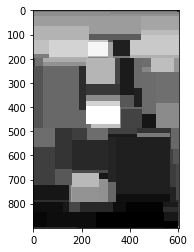

(543600, 1)
[86.48888889]


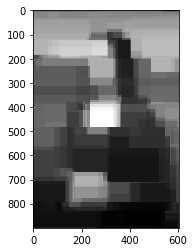

(543600, 1)
[72.20333333]


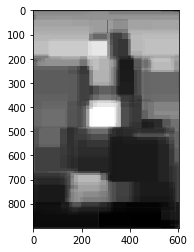

(543600, 1)
[81.96155983]


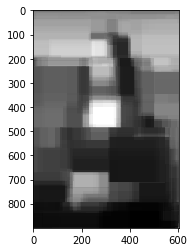

(543600, 1)
[80.48342416]


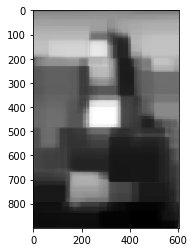

In [161]:
for n in [1, 3, 5, 10, 100]:
    clf = ensemble.RandomForestRegressor(n_estimators = n, max_depth = 7)
    clf = clf.fit(random_indexes, rand_forest_in )

    aa = np.array([(clf.predict([i])) for i in ind_img])
    print(aa.shape)
    print(aa[0])

    aa =aa.reshape(900,604)

    plt.imshow(aa, cmap="gray")
    plt.show()

<h3 style="color:blue">2(e) iii. As a simple baseline, repeat the experiment using a k-NNregressor, for k = 1. This means
that every pixel in the outputwill equal the nearest pixel fromthe “training set.” Compare
and contrast the outlook: why does this look the way it does?

<h3 style="color:k"> Answer: The K-NN regressor is simply looking for the pixel (in training set) with coordinates closest to each point in question. Because we generated the training set using an uniform sampling function (random.randint, versus, say a gaussian) for the pixel coordinates / intensity (with replacement), all regions have the same resolution. This is due to the fact that, in average, the training test contains equal number of "ground truth" pixels per unit area anywhere in the image. Therefore, all regions tend to have the same type of grainy structure (with grain boundaries corresponding to k-NN boundaries).


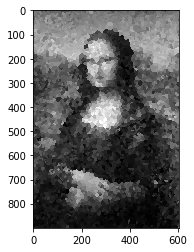

In [164]:
from sklearn.neighbors import KNeighborsClassifier as knn

knn_fit = knn(n_neighbors = 1)
knn_fit.fit(random_indexes, rand_forest_in)
fit_out = np.array(knn_fit.predict(ind_img)).reshape(900,604)

plt.imshow(fit_out, cmap="gray")
plt.show()


<h3 style="color:blue">2(e) iv. Experiment with different pruning strategies of your choice.

<h3 style="color:k"> Answer: In addition to the experiments with the tree depth and number of trees, I generated a pruning strategy based on the max_leaf_nodes parameters for the sklearn random forest module. The parameter generates N leaf nodes based on "best nodes", which are in turn defined based on their relative reduction in impurity.


(543600, 1)
[84.57446809]


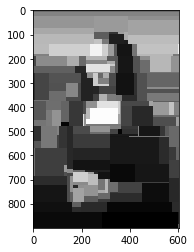

In [166]:
clf = ensemble.RandomForestRegressor(n_estimators = 1, max_leaf_nodes=200)
clf = clf.fit(random_indexes, rand_forest_in )

aa = np.array([(clf.predict([i])) for i in ind_img])
print(aa.shape)
print(aa[0])

aa =aa.reshape(900,604)

plt.imshow(aa, cmap="gray")
plt.show()

<h3 style="color:blue">2(f) i. What is the decision rule at each split point? Write down the 1-line formula for the split
point at the root node for one the trained decision trees inside the forest. Feel free to
define any variables you need.
<h3 style="color:k"> Answer: The decision rule is something like: if y > 475, then intensity_pixel = average(training{y>475}), else intensity_pixel = average(training{y<=475}).

<h3 style="color:blue">2(f) ii. Why does the resulting image look like the way it does? What shape are the patches of
color, and how are they arranged?
<h3 style="color:k"> Answer: For the root node with only one split, you get two squared, stacked vertically on top of each other. Overall, the Mona Lisa's picture is lighter on the top half versus the bottom half. Since most of the "high-level" variation is found along that axis, the impurity can be reduced the most by splitting the two half planes to separate the picture vertically, at the root node.
<h3 style="color:blue">2(f) iii. Straightforward: How many patches of color may be in the resulting image if the forest
contains a single decision tree? Define any variables you need.
<h3 style="color:k"> Answer: We get 2^N different colors, where N is the number of depth of the tree.
<h3 style="color:blue">2(f)  iv. Tricky: How many patches of color might be in the resulting image if the forest contains n decision trees? Define any variables you need.
<h3 style="color:k"> Answer: On one extreme case, you would get exactly the same decision trees (prohibitively unlikely for a picture with these many pixels, sampled at random). On the other extreme case, each time a new tree is generated, it is generated in such a way that it splits corresponding nodes for different trees across a different axis (parameter). In that case, a square with two trees (N_trees = 2) and one splitting point (N_node=1) can have (N_node+N_trees-1)^2 patches = 2^2 = 4. Generally the maximum combination of patches would be (N_node+N_trees-1)^2. Realistically, we'd expect hierarchical splitting to be done across different axes for each tree so the number of real patches will always be less than this upper bound.
